Challenge Exploratory Data

Buscamos la demanda de autos por color,
Es decir que color suelen ser mas demandados en la industria automotriz, para ello compararemos el kilometraje de cada auto en relacion a color y luego compararemos el precio con el color, para saber si el color de verdad es un factor que pueda afectar directamente a la demanda.

Empezamos importando las librerias necesarias para este analisis,
en esta ocacion tomaremos el siguiente Dataset : https://www.kaggle.com/lepchenkov/usedcarscatalog


In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('cars.csv')
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


Exploramos los datos que tenemos en el data set 

In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


Buscaremos y analizaremos la columna de odometer_value

In [3]:
max = df['odometer_value'].max()
min = df['odometer_value'].min()
median = df['odometer_value'].median()
Std = df['odometer_value'].std()

print('El maximo: ' + str(max),'El minimo: '+ str(min),'La mediana :' + str(median),'La desviacion estandar: ' + str(Std))

El maximo: 1000000 El minimo: 0 La mediana :250000.0 La desviacion estandar: 136072.37652978083


Ahora veamos un poco de graficos 

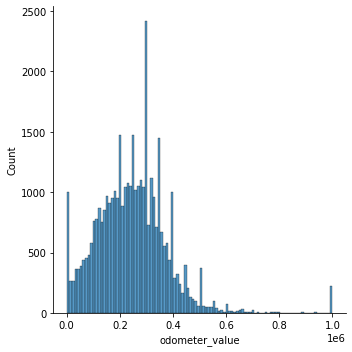

In [4]:
sns.displot(df, x='odometer_value')

Vemos que no tiene una distribucion normal, ahora analicemos los datos que nos aporta la columna Color

In [5]:
df.groupby('color').count()

,manufacturer_name,model_name,transmission,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
color,,,,,,,,,,,,,,,,,,,,,
black,7705,7705,7705,7705,7705,7705,7705,7705,7703,7705,...,7705,7705,7705,7705,7705,7705,7705,7705,7705,7705
blue,5802,5802,5802,5802,5802,5802,5802,5802,5801,5802,...,5802,5802,5802,5802,5802,5802,5802,5802,5802,5802
brown,886,886,886,886,886,886,886,886,886,886,...,886,886,886,886,886,886,886,886,886,886
green,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,...,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760
grey,3751,3751,3751,3751,3751,3751,3751,3751,3751,3751,...,3751,3751,3751,3751,3751,3751,3751,3751,3751,3751
orange,184,184,184,184,184,184,184,184,182,184,...,184,184,184,184,184,184,184,184,184,184
other,2688,2688,2688,2688,2688,2688,2688,2688,2687,2688,...,2688,2688,2688,2688,2688,2688,2688,2688,2688,2688
red,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,...,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925
silver,6852,6852,6852,6852,6852,6852,6852,6852,6851,6852,...,6852,6852,6852,6852,6852,6852,6852,6852,6852,6852


Vemos Todos los valores de la columna color, y su relacion con cada una de las demas columnas. Ahora veamos un poco de graficas.

<AxesSubplot:>

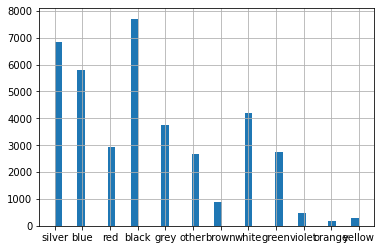

In [6]:
df['color'].hist(bins=40)

Vemos que en el dataset predomina los autos de color Negros seguidos del color plateado, y el que menos cantidad tiene son los coleres naranja y amarillo. Ahora comparemos el color de los autos con el kilometraje, veremos cual es el auto con mayor uso y si el color tiene relacion con ello.

<AxesSubplot:xlabel='price_usd', ylabel='Count'>

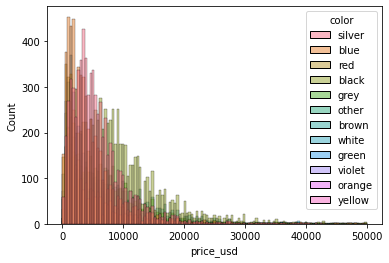

In [11]:
# Q7_df = df[(df['manufacturer_name']=='Audi') & (df['model_name']=='Q7')]
# sns.histplot(Q7_df, x ='price_usd', hue='year_produced')
Color_df = df[(df['manufacturer_name'] == 'BMW') & (df['color'])]
sns.histplot(df, x = 'price_usd', hue='color')

In [8]:
df['price_usd'].describe()

count    38531.000000
mean      6639.971021
std       6428.152018
min          1.000000
25%       2100.000000
50%       4800.000000
75%       8990.000000
max      50000.000000
Name: price_usd, dtype: float64

<AxesSubplot:xlabel='price_usd', ylabel='color'>

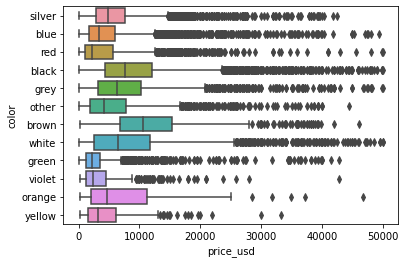

In [9]:
sns.boxplot(x = 'price_usd', y = 'color', data = df)

<AxesSubplot:xlabel='odometer_value', ylabel='color'>

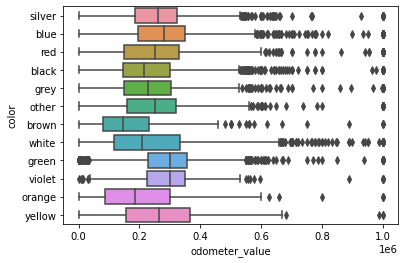

In [10]:
sns.boxplot(x = 'odometer_value', y = 'color', data = df)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6546a603-27c4-462c-b3e4-3d77f9bf61da' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>